Честнова Екатерина ИУ5-62Б

Рк 1 Вариант 20

Задача №3.
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?
Для произвольной колонки данных построить гистограмму.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving states_all.csv to states_all.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./states_all.csv', sep=',')

In [ ]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [ ]:
#размер датасета - количетсво строк и столбцов
df.shape

(1715, 25)

In [ ]:
df.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


In [ ]:
#поиск пропусков
for col in df.columns:
    is_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(is_missing*100)))

PRIMARY_KEY - 0%
STATE - 0%
YEAR - 0%
ENROLL - 29%
TOTAL_REVENUE - 26%
FEDERAL_REVENUE - 26%
STATE_REVENUE - 26%
LOCAL_REVENUE - 26%
TOTAL_EXPENDITURE - 26%
INSTRUCTION_EXPENDITURE - 26%
SUPPORT_SERVICES_EXPENDITURE - 26%
OTHER_EXPENDITURE - 29%
CAPITAL_OUTLAY_EXPENDITURE - 26%
GRADES_PK_G - 10%
GRADES_KG_G - 5%
GRADES_4_G - 5%
GRADES_8_G - 5%
GRADES_12_G - 5%
GRADES_1_8_G - 41%
GRADES_9_12_G - 38%
GRADES_ALL_G - 5%
AVG_MATH_4_SCORE - 67%
AVG_MATH_8_SCORE - 65%
AVG_READING_4_SCORE - 62%
AVG_READING_8_SCORE - 67%


Целочисленными значениями будем кодировать признак State(пропусков нет). Маштабировать - признак State_revenue (есть пропуски).

In [ ]:
df['STATE_REVENUE'].unique()

array([1659028.,  720711., 1369815., ..., 5986763., 1175899.,      nan])

In [ ]:
#заполним пропуски медианой
from sklearn.impute import SimpleImputer
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data1 = imp1.fit_transform(df[['STATE_REVENUE']])
pd.isnull(data1).sum()

0

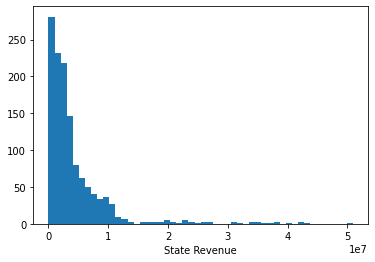

In [ ]:
plt.hist(df['STATE_REVENUE'], 50)
plt.xlabel('State Revenue')
plt.show()

Пропусков в столбце STATE_REVENUE не осталось

**Масштабирование данных**

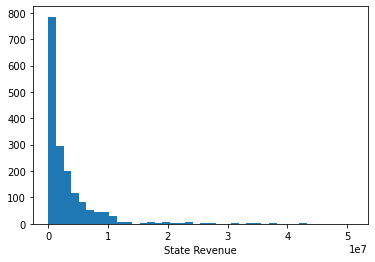

In [ ]:
plt.hist(data1, 40)
plt.xlabel('State Revenue')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data1)

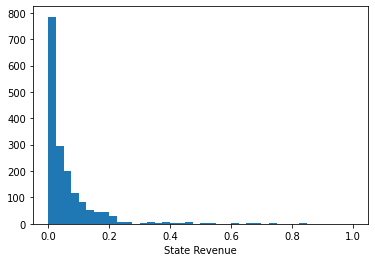

In [ ]:
plt.hist(sc1_data, 40)
plt.xlabel('State Revenue')
plt.show()

**Преобразование категориальных признаков в количественные**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
df['STATE']

0             ALABAMA
1              ALASKA
2             ARIZONA
3            ARKANSAS
4          CALIFORNIA
            ...      
1710         VIRGINIA
1711       WASHINGTON
1712    WEST_VIRGINIA
1713        WISCONSIN
1714          WYOMING
Name: STATE, Length: 1715, dtype: object

In [ ]:
df['STATE'].unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING', 'DODEA', 'NATIONAL'],
      dtype=object)

In [ ]:
#преобразование
le1 = LabelEncoder()
le1.fit_transform(df['STATE'])

array([ 0,  1,  2, ..., 50, 51, 52])

In [ ]:
list(le1.classes_)

['ALABAMA',
 'ALASKA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'COLORADO',
 'CONNECTICUT',
 'DELAWARE',
 'DISTRICT_OF_COLUMBIA',
 'DODEA',
 'FLORIDA',
 'GEORGIA',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'NATIONAL',
 'NEBRASKA',
 'NEVADA',
 'NEW_HAMPSHIRE',
 'NEW_JERSEY',
 'NEW_MEXICO',
 'NEW_YORK',
 'NORTH_CAROLINA',
 'NORTH_DAKOTA',
 'OHIO',
 'OKLAHOMA',
 'OREGON',
 'PENNSYLVANIA',
 'RHODE_ISLAND',
 'SOUTH_CAROLINA',
 'SOUTH_DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'VERMONT',
 'VIRGINIA',
 'WASHINGTON',
 'WEST_VIRGINIA',
 'WISCONSIN',
 'WYOMING']

Закодировали признак State целочисленными значениями методом label encoding

In [ ]:
enc1 = OneHotEncoder(handle_unknown='ignore')
state_enc = enc1.fit_transform(df[['STATE']])
state_enc.toarray()[0:7]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [ ]:
enc1.categories_

[array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
        'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
        'DODEA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS',
        'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE',
        'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA',
        'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NATIONAL', 'NEBRASKA',
        'NEVADA', 'NEW_HAMPSHIRE', 'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK',
        'NORTH_CAROLINA', 'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
        'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA',
        'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
        'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)]

Закодировали признак State целочисленными значениями методом one hot encoding

В данном случае предпочтительнее метод label encoding, так как в кодируемом столбце много уникальных значений, а значит большой размер матрицы при one hot encoding.

**Гистограмма**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


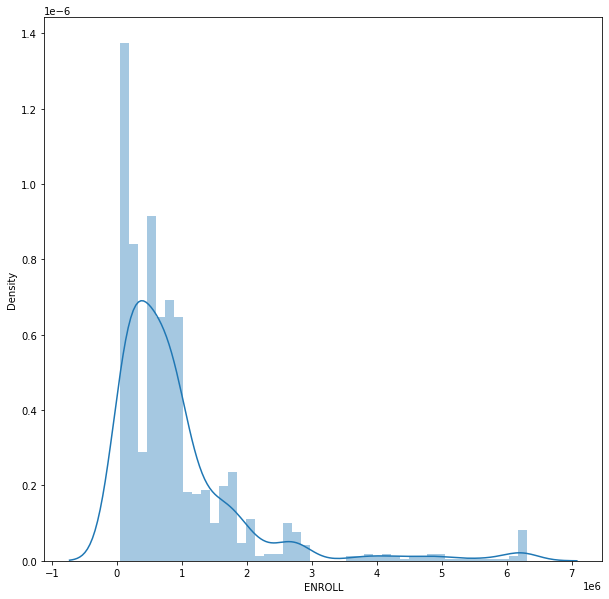

In [ ]:
#гистограмма, позволяющаяоценить плотность вероятности распределения
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df['ENROLL'])

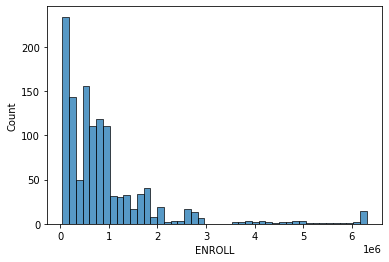

In [ ]:
sns.histplot(df['ENROLL'])